## 1. loading data into dataframe

In [50]:
from fyers_api import fyersModel
import os
import pandas as pd
import datetime as dt

with open("access.txt", 'r') as r:
    access_token = r.read()

client_id = 'L0QBIDUTN6-100'
fyers = fyersModel.FyersModel(token=access_token, log_path=os.getcwd(), client_id=client_id)

def gethist(stock, type, timeframe, duration):
    symbol = "NSE:" + stock + "-" + type
    start = dt.date.today() - dt.timedelta(duration)
    end = dt.date.today()
    print("from :", start, "    to:", end)
    
    sdata = pd.DataFrame()
    
    while start <= end:
        end2 = start + dt.timedelta(days=60)  
        print("start:", start, "   end:", end2)
        
        data = {"symbol": symbol,
                "resolution": timeframe,
                "date_format": "1", 
                "range_from": start, 
                "range_to": end2,
                "cont_flag": "1"
                }
        candles = fyers.history(data)
        
        if candles.get('candles'):
            s = pd.DataFrame(candles['candles'])
            sdata = pd.concat([sdata, s], ignore_index=True)
        
        start = end2 + dt.timedelta(1)
    
    sdata.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    sdata['date'] = pd.to_datetime(sdata['date'], unit='s')
    sdata['date'] = sdata['date'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
    sdata['date'] = sdata['date'].dt.tz_localize(None)
    sdata = sdata.set_index('date')
    
    return sdata

# Call the function and store the result in a DataFrame
data = gethist('TCS', 'EQ', 'D', 400)
print(data)


from : 2022-10-22     to: 2023-11-26
start: 2022-10-22    end: 2022-12-21
start: 2022-12-22    end: 2023-02-20
start: 2023-02-21    end: 2023-04-22
start: 2023-04-23    end: 2023-06-22
start: 2023-06-23    end: 2023-08-22
start: 2023-08-23    end: 2023-10-22
start: 2023-10-23    end: 2023-12-22
                        open     high      low    close   volume
date                                                            
2022-10-24 05:30:00  3170.10  3178.00  3155.00  3161.70   260949
2022-10-25 05:30:00  3180.50  3184.25  3151.15  3162.10  2069643
2022-10-27 05:30:00  3160.70  3174.00  3134.35  3157.40  2438421
2022-10-28 05:30:00  3150.00  3178.50  3145.00  3163.25  1355739
2022-10-31 05:30:00  3199.00  3199.00  3177.80  3193.15  1919414
...                      ...      ...      ...      ...      ...
2023-11-20 05:30:00  3491.25  3533.90  3491.25  3519.60  1475621
2023-11-21 05:30:00  3519.60  3539.05  3501.00  3510.20  1807236
2023-11-22 05:30:00  3500.00  3532.65  3481.10  3530.1

In [51]:
data.head()

,open,high,low,close,volume
date,,,,,
2022-10-24 05:30:00,3170.1,3178.00,3155.00,3161.70,260949
2022-10-25 05:30:00,3180.5,3184.25,3151.15,3162.10,2069643
2022-10-27 05:30:00,3160.7,3174.00,3134.35,3157.40,2438421
2022-10-28 05:30:00,3150.0,3178.50,3145.00,3163.25,1355739
2022-10-31 05:30:00,3199.0,3199.00,3177.80,3193.15,1919414


## 2.History plot

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
# import plotly as plt

<Axes: xlabel='date'>

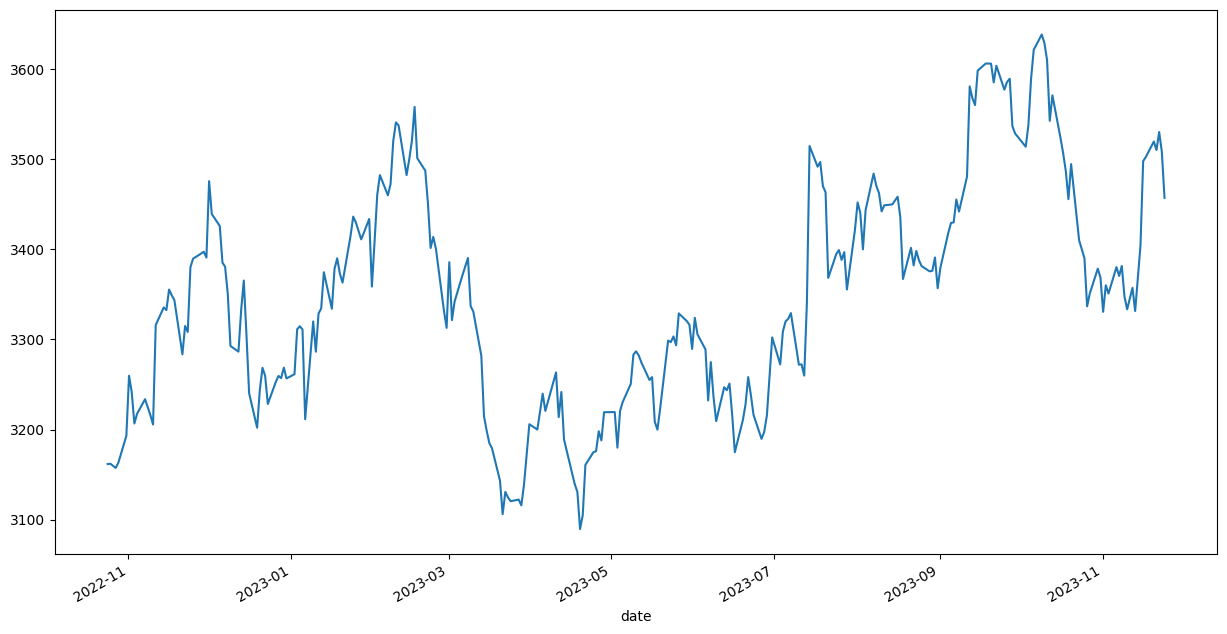

In [53]:
data[-400:].close.plot(figsize = (15,8))

## 3. Golden crossover

20 SMA crosses 50 SMA for buy
50 SMA crosses 520 SMA for sell

In [54]:
data['20_SMA'] = data.close.rolling(window =20, min_periods = 1).mean()
data['50_SMA'] = data.close.rolling(window =50, min_periods = 1).mean()

In [55]:
data['signal'] = 0
data['signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1, 0)

In [56]:
data['Position'] = data.signal.diff()

In [57]:
data.tail(100)

,open,high,low,close,volume,20_SMA,50_SMA,signal,Position
date,,,,,,,,,
2023-07-04 05:30:00,3290.00,3315.00,3277.30,3308.85,1656681,3236.1400,3248.348,0,0.0
2023-07-05 05:30:00,3320.00,3329.00,3305.00,3319.95,1453008,3240.5225,3251.251,0,0.0
2023-07-06 05:30:00,3306.55,3328.45,3302.00,3322.90,1848238,3242.9225,3254.189,0,0.0
2023-07-07 05:30:00,3302.00,3356.90,3302.00,3329.25,1789326,3247.5625,3256.811,0,0.0
2023-07-10 05:30:00,3324.75,3324.75,3265.20,3271.95,1407431,3250.6950,3258.491,0,0.0
...,...,...,...,...,...,...,...,...,...
2023-11-20 05:30:00,3491.25,3533.90,3491.25,3519.60,1475621,3385.1550,3486.560,0,0.0
2023-11-21 05:30:00,3519.60,3539.05,3501.00,3510.20,1807236,3390.1575,3487.659,0,0.0
2023-11-22 05:30:00,3500.00,3532.65,3481.10,3530.15,1798051,3397.1600,3489.424,0,0.0


## 4. History plotting

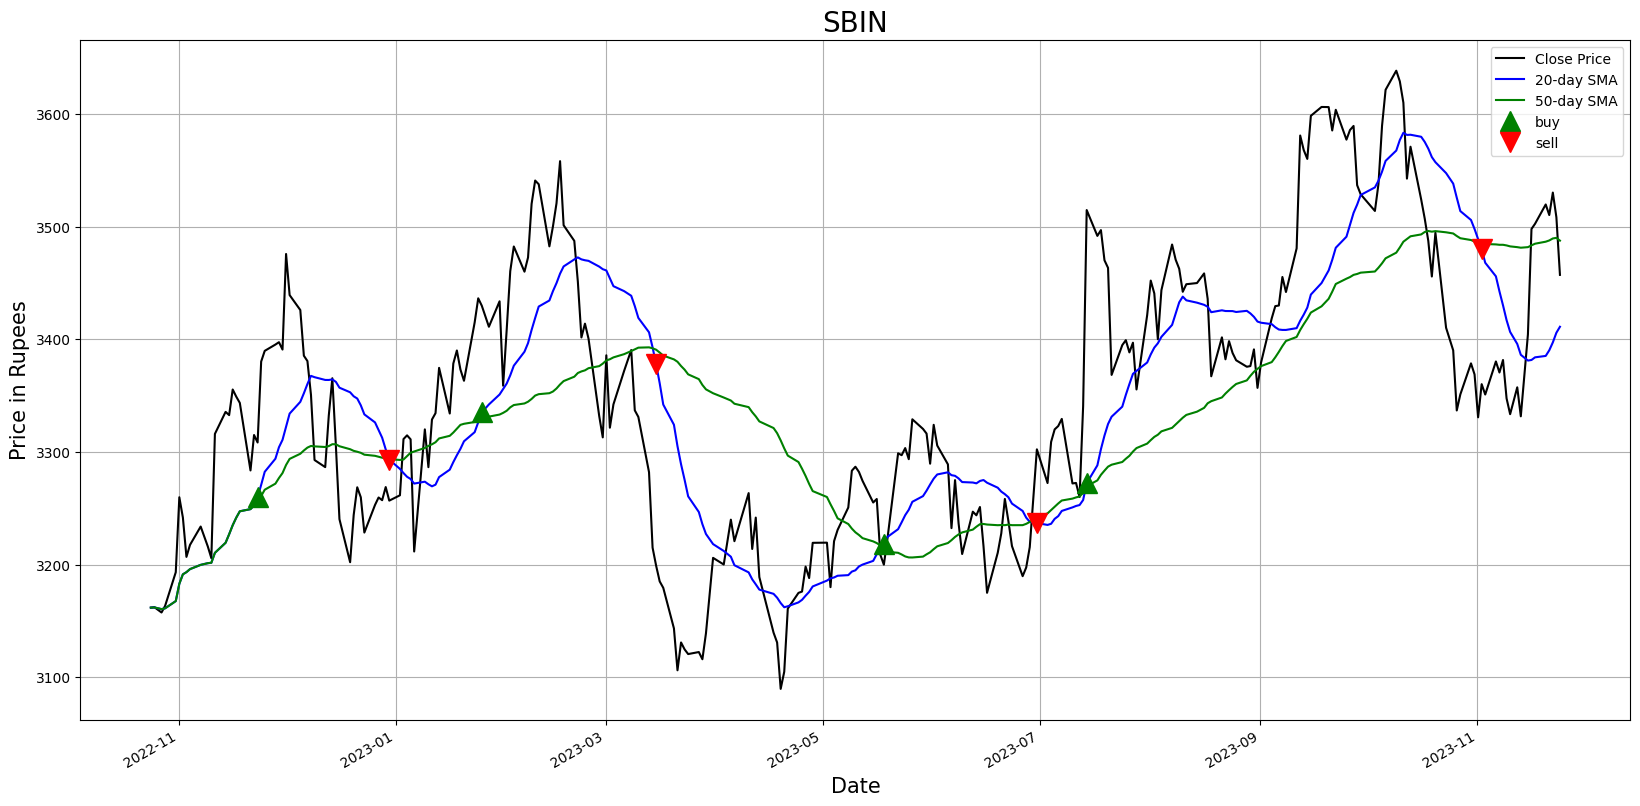

In [58]:
plt.figure(figsize = (20,10))
# plot close price, short-term and Long-term moving averages 
data.iloc[-300: ]['close'].plot(color = 'k', label= 'Close Price') 
data.iloc[-300: ]['20_SMA'].plot(color = 'b', label= '20-day SMA') 
data.iloc[-300:]['50_SMA'].plot(color = 'g', label = '50-day SMA') 

# plot 'buy' signals
plt.plot(data.iloc[-300:][data.iloc[-300:]['Position'] == 1].index, 
        data.iloc[-300:]['20_SMA'][data.iloc[-300:]['Position'] == 1],
        '^', markersize =15, color='g', label= 'buy')

# plot 'sell' signals
plt.plot(data.iloc[-300:][data.iloc[-300:]['Position']== -1].index,
         data.iloc[-300:]['20_SMA'][data.iloc[-300:]['Position'] == -1],
         'v', markersize = 15, color = 'r', label = 'sell')

plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('SBIN', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [63]:
df_pos = data.iloc[-200:][(data.iloc[-200:]['Position']==1) | (data['Position'] ==-1)].copy()
df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_pos[['close', 'Position']], headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+------------+
| date                |   close | Position   |
|---------------------+---------+------------|
| 2023-03-15 05:30:00 | 3198.9  | Sell       |
| 2023-05-18 05:30:00 | 3199.85 | Buy        |
| 2023-06-30 05:30:00 | 3302.25 | Sell       |
| 2023-07-14 05:30:00 | 3514.65 | Buy        |
| 2023-11-02 05:30:00 | 3360.1  | Sell       |
+---------------------+---------+------------+


/tmp/ipykernel_496082/84426750.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = data.iloc[-200:][(data.iloc[-200:]['Position']==1) | (data['Position'] ==-1)].copy()


## 5. Complete Code - Golden Crossover with Backtest

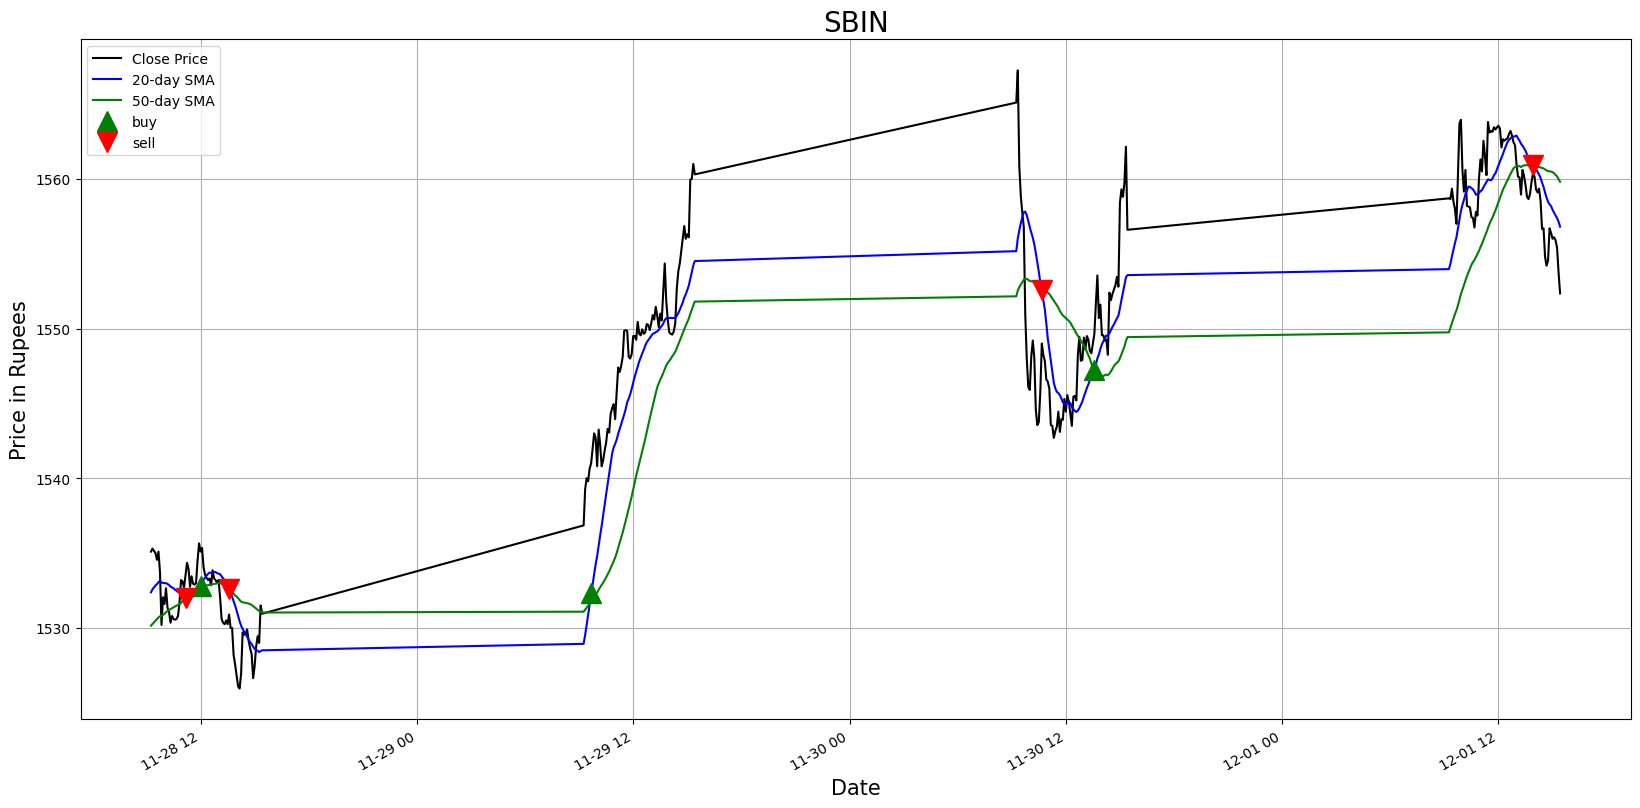

+---------------------+---------+------------+
| date                |   close | Position   |
|---------------------+---------+------------|
| 2023-11-28 11:10:00 | 1533.55 | Sell       |
| 2023-11-28 12:00:00 | 1535.1  | Buy        |
| 2023-11-28 13:35:00 | 1530.9  | Sell       |
| 2023-11-29 09:40:00 | 1541    | Buy        |
| 2023-11-30 10:40:00 | 1549    | Sell       |
| 2023-11-30 13:35:00 | 1549.65 | Buy        |
| 2023-12-01 13:55:00 | 1560.4  | Sell       |
+---------------------+---------+------------+


/tmp/ipykernel_1423133/3758850293.py:75: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = sdata.iloc[-300:][(sdata.iloc[-300:]['Position'] == 1) | (sdata['Position'] == -1)].copy()


In [3]:
from fyers_api import fyersModel
import os
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

with open("access.txt", 'r') as r:
    access_token = r.read()

client_id = 'L0QBIDUTN6-100'
fyers = fyersModel.FyersModel(token=access_token, log_path=os.getcwd(), client_id=client_id)

def gethist(stock, type, timeframe, duration):
    symbol = "NSE:" + stock + "-" + type
    start = dt.date.today() - dt.timedelta(duration)
    end = dt.date.today()
    
    sdata = pd.DataFrame()
    
    while start <= end:
        end2 = start + dt.timedelta(days=60)  
        
        data = {"symbol": symbol,
                "resolution": timeframe,
                "date_format": "1", 
                "range_from": start, 
                "range_to": end2,
                "cont_flag": "1"
                }
        candles = fyers.history(data)
        
        if candles.get('candles'):
            s = pd.DataFrame(candles['candles'])
            sdata = pd.concat([sdata, s], ignore_index=True)
        
        start = end2 + dt.timedelta(1)
    
    sdata.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    sdata['date'] = pd.to_datetime(sdata['date'], unit='s')
    sdata['date'] = sdata['date'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
    sdata['date'] = sdata['date'].dt.tz_localize(None)
    sdata = sdata.set_index('date')
    
    sdata['20_SMA'] = sdata['close'].rolling(window=20, min_periods=1).mean()
    sdata['50_SMA'] = sdata['close'].rolling(window=50, min_periods=1).mean()
    sdata['signal'] = 0
    sdata['signal'] = np.where(sdata['20_SMA'] > sdata['50_SMA'], 1, 0)
    sdata['Position'] = sdata['signal'].diff()
    
    plt.figure(figsize=(20, 10))
    # plot close price, short-term and Long-term moving averages 
    sdata.iloc[-300:]['close'].plot(color='k', label='Close Price') 
    sdata.iloc[-300:]['20_SMA'].plot(color='b', label='20-day SMA') 
    sdata.iloc[-300:]['50_SMA'].plot(color='g', label='50-day SMA') 

    # plot 'buy' signals
    plt.plot(sdata.iloc[-300:][sdata.iloc[-300:]['Position'] == 1].index, 
             sdata.iloc[-300:]['20_SMA'][sdata.iloc[-300:]['Position'] == 1],
             '^', markersize=15, color='g', label='buy')

    # plot 'sell' signals
    plt.plot(sdata.iloc[-300:][sdata.iloc[-300:]['Position'] == -1].index,
             sdata.iloc[-300:]['20_SMA'][sdata.iloc[-300:]['Position'] == -1],
             'v', markersize=15, color='r', label='sell')

    plt.ylabel('Price in Rupees', fontsize=15)
    plt.xlabel('Date', fontsize=15)
    plt.title('SBIN', fontsize=20)
    plt.legend()
    plt.grid()
    plt.show()
    
    df_pos = sdata.iloc[-300:][(sdata.iloc[-300:]['Position'] == 1) | (sdata['Position'] == -1)].copy()
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    print(tabulate(df_pos[['close', 'Position']], headers='keys', tablefmt='psql'))
    
    return sdata, df_pos

# Call the function and store the result in DataFrames
data, df_pos = gethist('HDFCBANK', 'EQ', '5', 200)
# Now you can use 'data' and 'df_pos' DataFrames


In [4]:
df_pos['profit'] = df_pos['close'].diff()
profit = df_pos[['close', '20_SMA','50_SMA', 'Position','signal', 'profit']]

# Add a new column 'buy_to_sell_diff' with NaN values
profit['buy_to_sell_diff'] = np.nan

# Fill the 'buy_to_sell_diff' column based on the 'Position' values
profit['buy_to_sell_diff'][profit['signal'].shift(-1) == 1] = profit['profit'][profit['signal'].shift(-1) == 1]
profit['buy_to_sell_diff'][profit['signal'].shift(-1) == -1] = -profit['profit'][profit['signal'].shift(-1) == -1]

# Display the DataFrame
profit


/tmp/ipykernel_1423133/2235367825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit['buy_to_sell_diff'] = np.nan
/tmp/ipykernel_1423133/2235367825.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit['buy_to_sell_diff'][profit['signal'].shift(-1) == 1] = profit['profit'][profit['signal'].shift(-1) == 1]
/tmp/ipykernel_1423133/2235367825.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

,close,20_SMA,50_SMA,Position,signal,profit,buy_to_sell_diff
date,,,,,,,
2023-11-28 11:10:00,1533.55,1532.0125,1532.032,Sell,0,NaN,NaN
2023-11-28 12:00:00,1535.10,1532.8100,1532.709,Buy,1,1.55,NaN
2023-11-28 13:35:00,1530.90,1532.6100,1532.619,Sell,0,-4.20,-4.2
2023-11-29 09:40:00,1541.00,1532.3050,1531.800,Buy,1,10.10,NaN
2023-11-30 10:40:00,1549.00,1552.5450,1552.652,Sell,0,8.00,8.0
2023-11-30 13:35:00,1549.65,1547.2375,1547.066,Buy,1,0.65,NaN
2023-12-01 13:55:00,1560.40,1560.9475,1560.992,Sell,0,10.75,NaN


## 5 sma with Back Test

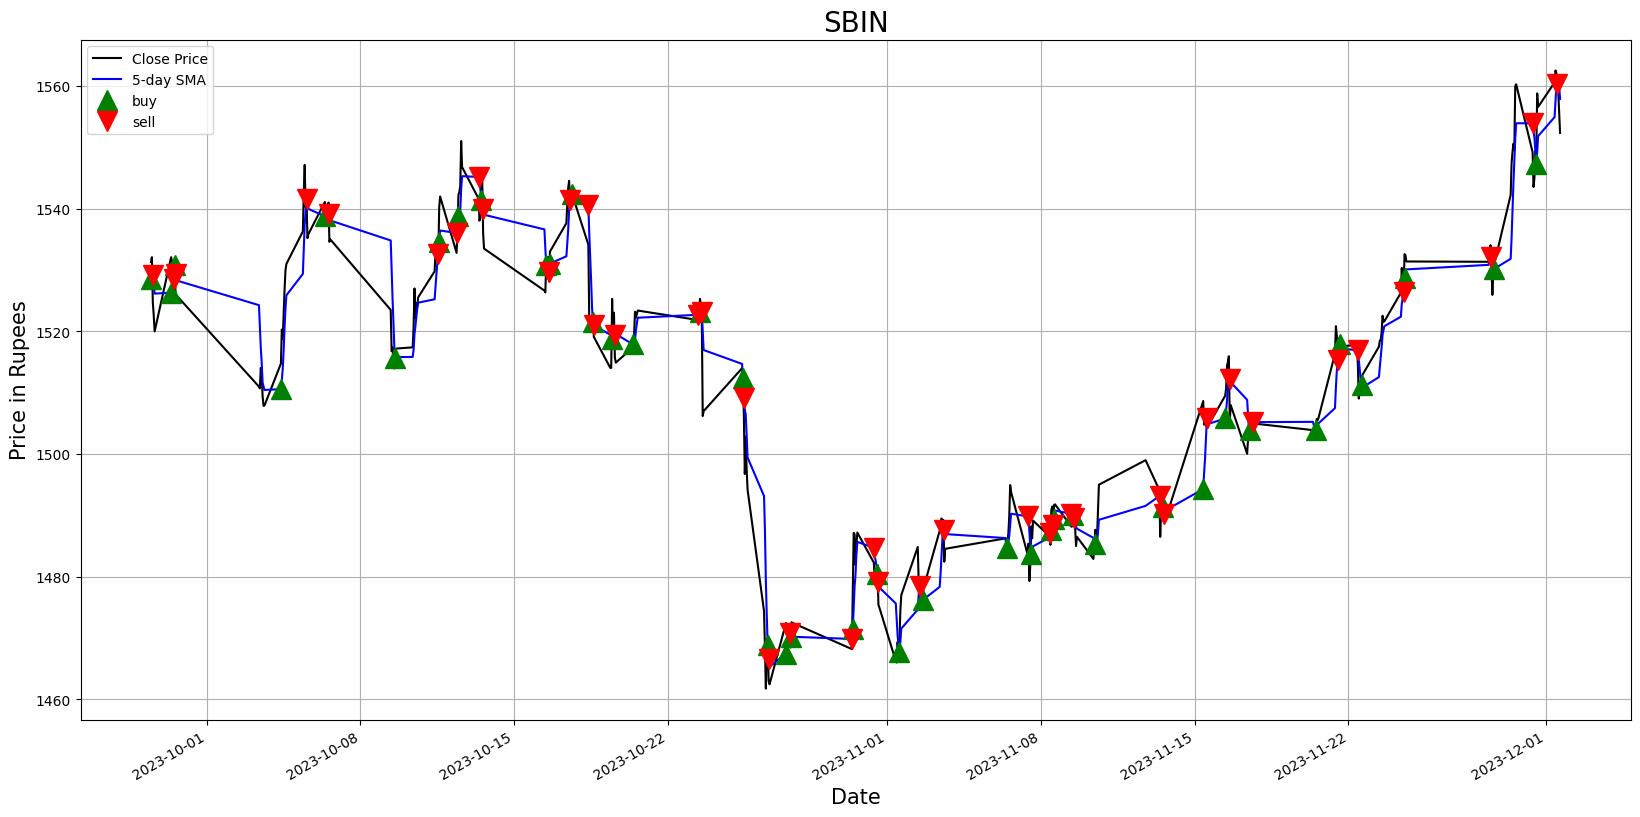

+---------------------+---------+------------+
| date                |   close | Position   |
|---------------------+---------+------------|
| 2023-10-19 14:15:00 | 1515.7  | Sell       |
| 2023-10-20 10:15:00 | 1518.7  | Buy        |
| 2023-10-23 09:15:00 | 1521.85 | Sell       |
| 2023-10-23 11:15:00 | 1525.3  | Buy        |
| 2023-10-23 13:15:00 | 1522.1  | Sell       |
| 2023-10-25 10:15:00 | 1512.65 | Buy        |
| 2023-10-25 11:15:00 | 1505.9  | Sell       |
| 2023-10-26 13:15:00 | 1470    | Buy        |
| 2023-10-26 14:15:00 | 1463    | Sell       |
| 2023-10-27 09:15:00 | 1472.45 | Buy        |
| 2023-10-27 13:15:00 | 1470.3  | Sell       |
| 2023-10-27 15:15:00 | 1472.55 | Buy        |
| 2023-10-30 09:15:00 | 1468.2  | Sell       |
| 2023-10-30 10:15:00 | 1477.7  | Buy        |
| 2023-10-31 09:15:00 | 1482.3  | Sell       |
| 2023-10-31 13:15:00 | 1481.9  | Buy        |
| 2023-10-31 14:15:00 | 1475.45 | Sell       |
| 2023-11-01 13:15:00 | 1469.5  | Buy        |
| 2023-11-02 

/tmp/ipykernel_1421805/582741449.py:72: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = sdata.iloc[-200:][(sdata.iloc[-200:]['Position'] == 1) | (sdata['Position'] == -1)].copy()


In [4]:
from fyers_api import fyersModel
import os
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

with open("access.txt", 'r') as r:
    access_token = r.read()

client_id = 'L0QBIDUTN6-100'
fyers = fyersModel.FyersModel(token=access_token, log_path=os.getcwd(), client_id=client_id)

def gethist(stock, type, timeframe, duration):
    symbol = "NSE:" + stock + "-" + type
    start = dt.date.today() - dt.timedelta(duration)
    end = dt.date.today()
    
    sdata = pd.DataFrame()
    
    while start <= end:
        end2 = start + dt.timedelta(days=60)  
        
        data = {"symbol": symbol,
                "resolution": timeframe,
                "date_format": "1", 
                "range_from": start, 
                "range_to": end2,
                "cont_flag": "1"
                }
        candles = fyers.history(data)
        
        if candles.get('candles'):
            s = pd.DataFrame(candles['candles'])
            sdata = pd.concat([sdata, s], ignore_index=True)
        
        start = end2 + dt.timedelta(1)
    
    sdata.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
    sdata['date'] = pd.to_datetime(sdata['date'], unit='s')
    sdata['date'] = sdata['date'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
    sdata['date'] = sdata['date'].dt.tz_localize(None)
    sdata = sdata.set_index('date')
    
    sdata['5_SMA'] = sdata['close'].rolling(window=5, min_periods=1).mean()
    sdata['signal'] = 0
    sdata['signal'] = np.where(sdata['close'] > sdata['5_SMA'], 1, 0)
    sdata['Position'] = sdata['signal'].diff()
    
    plt.figure(figsize=(20, 10))
    sdata.iloc[-300:]['close'].plot(color='k', label='Close Price') 
    sdata.iloc[-300:]['5_SMA'].plot(color='b', label='5-day SMA') 

    # plot 'buy' signals
    plt.plot(sdata.iloc[-300:][sdata.iloc[-300:]['Position'] == 1].index, 
             sdata.iloc[-300:]['5_SMA'][sdata.iloc[-300:]['Position'] == 1],
             '^', markersize=15, color='g', label='buy')

    # plot 'sell' signals
    plt.plot(sdata.iloc[-300:][sdata.iloc[-300:]['Position'] == -1].index,
             sdata.iloc[-300:]['5_SMA'][sdata.iloc[-300:]['Position'] == -1],
             'v', markersize=15, color='r', label='sell')

    plt.ylabel('Price in Rupees', fontsize=15)
    plt.xlabel('Date', fontsize=15)
    plt.title('SBIN', fontsize=20)
    plt.legend()
    plt.grid()
    plt.show()
    
    df_pos = sdata.iloc[-200:][(sdata.iloc[-200:]['Position'] == 1) | (sdata['Position'] == -1)].copy()
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    print(tabulate(df_pos[['close', 'Position']], headers='keys', tablefmt='psql'))
    
    return sdata, df_pos

# Call the function and store the result in a DataFrame
data, df_pos = gethist('HDFCBANK', 'EQ', '60', 100)


In [5]:
df_pos['profit'] = df_pos['close'].diff()
profit = df_pos[['close', '5_SMA', 'Position','signal', 'profit']]

# Add a new column 'buy_to_sell_diff' with NaN values
profit['buy_to_sell_diff'] = np.nan

# Fill the 'buy_to_sell_diff' column based on the 'Position' values
profit['buy_to_sell_diff'][profit['signal'].shift(-1) == 1] = profit['profit'][profit['signal'].shift(-1) == 1]
profit['buy_to_sell_diff'][profit['signal'].shift(-1) == -1] = -profit['profit'][profit['signal'].shift(-1) == -1]

# Display the DataFrame
profit


/tmp/ipykernel_1421805/597151518.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit['buy_to_sell_diff'] = np.nan
/tmp/ipykernel_1421805/597151518.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit['buy_to_sell_diff'][profit['signal'].shift(-1) == 1] = profit['profit'][profit['signal'].shift(-1) == 1]
/tmp/ipykernel_1421805/597151518.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,close,5_SMA,Position,signal,profit,buy_to_sell_diff
date,,,,,,
2023-10-19 14:15:00,1515.70,1519.39,Sell,0,NaN,NaN
2023-10-20 10:15:00,1518.70,1517.93,Buy,1,3.00,NaN
2023-10-23 09:15:00,1521.85,1522.71,Sell,0,3.15,3.15
2023-10-23 11:15:00,1525.30,1523.10,Buy,1,3.45,NaN
2023-10-23 13:15:00,1522.10,1523.11,Sell,0,-3.20,-3.20
2023-10-25 10:15:00,1512.65,1512.39,Buy,1,-9.45,NaN
2023-10-25 11:15:00,1505.90,1509.15,Sell,0,-6.75,-6.75
2023-10-26 13:15:00,1470.00,1468.81,Buy,1,-35.90,NaN
2023-10-26 14:15:00,1463.00,1466.53,Sell,0,-7.00,-7.00
